In [136]:
#####################
# PART 1: Questions #
#####################

In [137]:
# Question 1: 
# What factors are correlated with a higher survival rate?

In [138]:
# Question 2:
# Does port of embarkation correlate with any interesting factors?

In [139]:
########################################
# PART 2: Data Wrangling & Exploration #
########################################

In [140]:
import numpy as np
import pandas as pd

In [141]:
titanic_df = pd.read_csv('titanic_data.csv')

In [142]:
titanic_df.head() # see header

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [143]:
# The data seems to be in relatively good shape, with data in each category in similar format. 
# The only exception is 'Cabin'. It seems like people in third class have a NaN for 'Cabin', 
# possibly because they don't have a private cabin. 

In [144]:
len(titanic_df)

891

In [145]:
titanic_df = titanic_df.drop('PassengerId', 1) # Passenger Id seems unnecessary, so I'll remove it. 

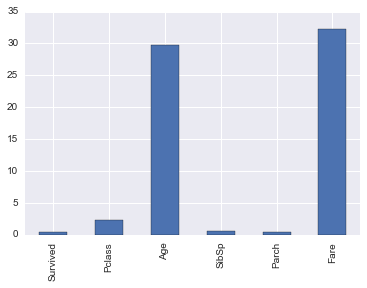

In [146]:
titanic_df.mean().plot(kind='bar') # This bar graph shows a better visual of the mean of the data across the categories.

In [147]:
# Investigate Question 1: Survival Factors #

In [148]:
group_survived = titanic_df.groupby('Survived') # Group data by 'Survived'
color=['r','g'] # color for plotting later

In [149]:
group_survived.describe()

Age        Fare       Parch      Pclass       SibSp
Survived                                                                  
0        count  424.000000  549.000000  549.000000  549.000000  549.000000
         mean    30.626179   22.117887    0.329690    2.531876    0.553734
         std     14.172110   31.388207    0.823166    0.735805    1.288399
         min      1.000000    0.000000    0.000000    1.000000    0.000000
         25%     21.000000    7.854200    0.000000    2.000000    0.000000
         50%     28.000000   10.500000    0.000000    3.000000    0.000000
         75%     39.000000   26.000000    0.000000    3.000000    1.000000
         max     74.000000  263.000000    6.000000    3.000000    8.000000
1        count  290.000000  342.000000  342.000000  342.000000  342.000000
         mean    28.343690   48.395408    0.464912    1.950292    0.473684
         std     14.950952   66.596998    0.771712    0.863321    0.708688
         min      0.420000    0.000000    0.000000    1.000000    0.000000
         25%     19.000000   12.475000    0.000000    1.000000    0.000000
         50%     28.000000   26.000000    0.000000    2.000000    0.000000
         75%     36.000000   57.000000    1.000000    3.000000    1.000000
         max     80.000000  512.329200    5.000000    3.000000    4.000000

In [150]:
# Inferences from the table above:
# 1. The count for all of the categories are the same and add up to 891 (549+342), 
#    which is the total number of passengers. However, the count for the 'Age' is less,
#    which indicates that some information for the passengers' age is missing. Since I do not know 
#    why some of the ages are missing and how they may or may not be biased, I will put off on using the Age data. 
# 2. More people perished (549 people) than survived (342 people).
# 3. The distribution and the mean suggests that most people who survived were in first and second class, 
#    while most people who perished were in second and third class. 
# 4. People who survived, on average, paid more for their fare than people who died.

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt

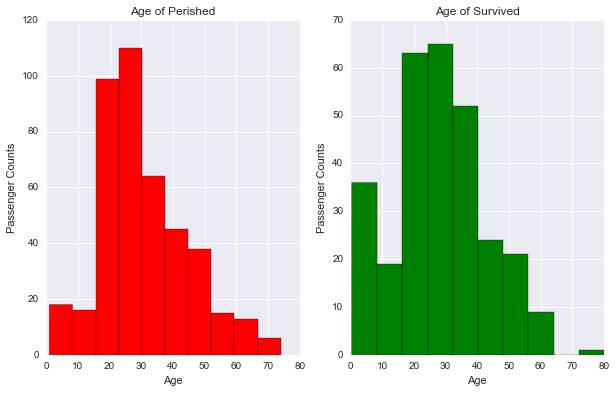

In [152]:
%matplotlib inline

fig, axs = plt.subplots(1, 2, figsize=(10,6))

for ind, grp in group_survived:
    grp['Age'].plot(kind='hist', color=color[ind], ax = axs[ind])

axs[0].set_xlabel('Age')
axs[0].set_ylabel('Passenger Counts')
axs[0].set_title('Age of Perished')

axs[1].set_xlabel('Age')
axs[1].set_ylabel('Passenger Counts')
axs[1].set_title('Age of Survived')

In [153]:
# These histograms show an interesting distribution of the age of people who survived and people who perished. 
# It seems that people who perished were overwhelmingly in their 20s-30s, with less than 50% chance of survival. 
# While older people, in their 50s-60s, and young children, younger than 10 years of age, 
# were more likely to survive than to perish.

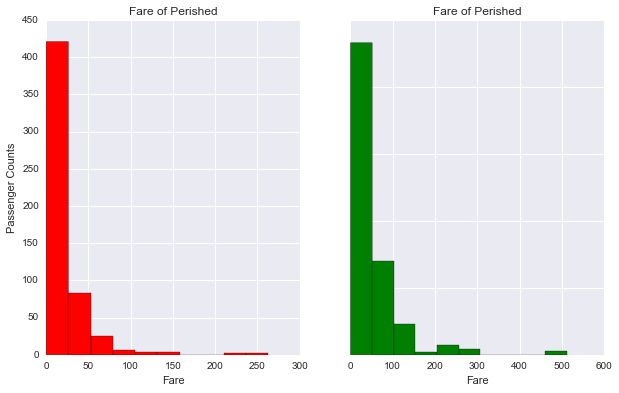

In [154]:
fig, axs = plt.subplots(1, 2, figsize=(10,6))

for ind, grp in group_survived:
    grp['Fare'].plot(kind='hist', color=color[ind], ax = axs[ind], sharey=True)

axs[0].set_xlabel('Fare')
axs[0].set_ylabel('Passenger Counts')
axs[0].set_title('Fare of Perished')

axs[1].set_xlabel('Fare')
axs[1].set_ylabel('Passenger Counts')
axs[1].set_title('Fare of Perished')

In [155]:
# These histograms supports the initial 'describe' inferences that people who survived on average paid a higher fare. 

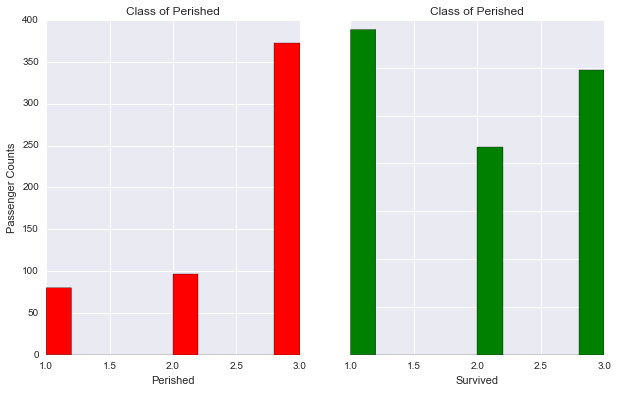

In [156]:
fig, axs = plt.subplots(1, 2, figsize=(10,6))

for ind, grp in group_survived:
    grp['Pclass'].plot(kind='hist', color=color[ind], ax = axs[ind], sharey=True)

axs[0].set_xlabel('Perished')
axs[0].set_ylabel('Passenger Counts')
axs[0].set_title('Class of Perished')

axs[1].set_xlabel('Survived')
axs[1].set_ylabel('Passenger Counts')
axs[1].set_title('Class of Perished')

In [157]:
# These histograms show that people in first class had a higher chance of survival than people in second and third class. 
# With people in third class with the lowest chance of survival.
# Almost 400 people in first class survived, while only about 75 of them perished. This survival rate is much higher 
# than the ~300 that survived in third class and the ~375 that perished. 

In [158]:
def correlation(x,y):
    std_x = (x-x.mean()) / x.std(ddof=0)
    std_y = (y-y.mean()) / y.std(ddof=0)
    
    return (std_x * std_y).mean()

In [159]:
correlation(titanic_df['Survived'], titanic_df['Pclass'])

-0.33848103596101325

In [160]:
# The data suggests that survival rates have a -0.338 correlation with class.
# With higher class having a better chance of survival.

In [161]:
# Investigate Question 2: Port of embarkation #

In [162]:
group_embarked = titanic_df.groupby('Embarked') # group by port of embarkation

In [163]:
group_embarked.describe()

Age        Fare       Parch      Pclass       SibSp  \
Embarked                                                                     
C        count  130.000000  168.000000  168.000000  168.000000  168.000000   
         mean    30.814769   59.954144    0.363095    1.886905    0.386905   
         std     15.434860   83.912994    0.660481    0.944100    0.557213   
         min      0.420000    4.012500    0.000000    1.000000    0.000000   
         25%     21.250000   13.697950    0.000000    1.000000    0.000000   
         50%     29.000000   29.700000    0.000000    1.000000    0.000000   
         75%     40.000000   78.500025    1.000000    3.000000    1.000000   
         max     71.000000  512.329200    3.000000    3.000000    2.000000   
Q        count   28.000000   77.000000   77.000000   77.000000   77.000000   
         mean    28.089286   13.276030    0.168831    2.909091    0.428571   
         std     16.915396   14.188047    0.656999    0.369274    0.979105   
         min      2.000000    6.750000    0.000000    1.000000    0.000000   
         25%     17.500000    7.750000    0.000000    3.000000    0.000000   
         50%     27.000000    7.750000    0.000000    3.000000    0.000000   
         75%     34.500000   15.500000    0.000000    3.000000    0.000000   
         max     70.500000   90.000000    5.000000    3.000000    4.000000   
S        count  554.000000  644.000000  644.000000  644.000000  644.000000   
         mean    29.445397   27.079812    0.413043    2.350932    0.571429   
         std     14.143192   35.887993    0.853253    0.789402    1.216600   
         min      0.670000    0.000000    0.000000    1.000000    0.000000   
         25%     21.000000    8.050000    0.000000    2.000000    0.000000   
         50%     28.000000   13.000000    0.000000    3.000000    0.000000   
         75%     38.000000   27.900000    0.000000    3.000000    1.000000   
         max     80.000000  263.000000    6.000000    3.000000    8.000000   

                  Survived  
Embarked                    
C        count  168.000000  
         mean     0.553571  
         std      0.498608  
         min      0.000000  
         25%      0.000000  
         50%      1.000000  
         75%      1.000000  
         max      1.000000  
Q        count   77.000000  
         mean     0.389610  
         std      0.490860  
         min      0.000000  
         25%      0.000000  
         50%      0.000000  
         75%      1.000000  
         max      1.000000  
S        count  644.000000  
         mean     0.336957  
         std      0.473037  
         min      0.000000  
         25%      0.000000  
         50%      0.000000  
         75%      1.000000  
         max      1.000000

In [ ]:
# According to the table above, more people embarked from Southampton (count=644) than Cherbourg (count=168) and Queenstown (count=77).
# The data suggests that the people who embarked from Cherbourg paid a higher fare (M=59.95, SD=83.9)
# than those who embarked from Queenstown (M=13.28, SD=14.19) and Southampton (M=27.08, SD=35.89). 
# Unsurprisingly, the people who embarked from Cherbourg tend to be in a higher class (M=1.89, SD=0.94)
# than those who embarked from Queenstown (M=2.91, SD=0.37) and Southampton (M=2.35, SD=0.79). 
# Also unsurprisingly, the people from Cherbourg had a higher likelihood of survival (M=0.55, SD=.50)
# than those who embarked from Queenstown (M=0.39, SD=0.49) and Southampton (M=0.34, SD=0.47). 
# However, it is surprising that the people from Queenstown had a slightly higher chance of survival than 
# people from Southampton, despite paying, in general, a lower fare and being from a lower class. 

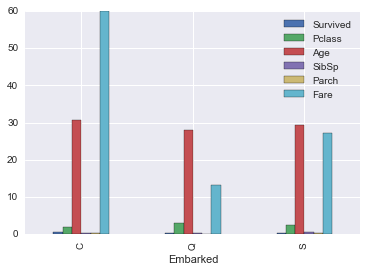

In [164]:
group_embarked.mean().plot(kind='bar') 

# A general bar plot to see an overview of the similarities and differences for the people who embarked from different ports. 

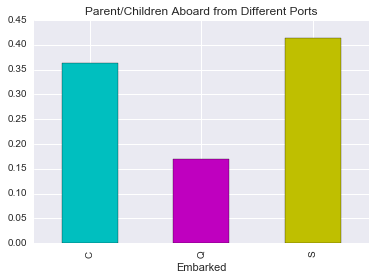

In [169]:
group_embarked['Parch'].mean().plot(kind='bar', color=['c','m','y'], title='Parent/Children Aboard from Different Ports') 

# A closer look at the parents/children aboard.
# This bar graph shows that people embarking from Southampton are traveling with more parent/children than 
# people from Cherbourg and Queenstown

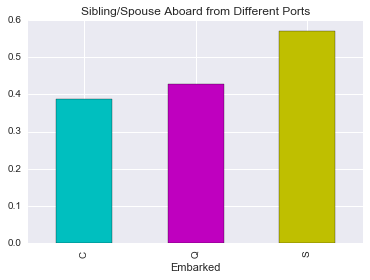

In [170]:
group_embarked['SibSp'].mean().plot(kind='bar', color=['c','m','y'], title='Sibling/Spouse Aboard from Different Ports')

# A closer look at the sibling/spouse aboard.
# Once again, people from Southampton are traveling with more sibling/spouse than the other two ports. This may 
# indicate that they are traveling as a whole family.
# However, it is surprising that people from Cherbourg are traveling with less sibling/spouse than people from Queenstown
# despite traveling with more parent/children. 

In [168]:
######################
# PART 3: Conclusion #
######################

In [171]:
# 1. Factors that correlated with a higher survival rate were higher classes and higher fares. 
#    People less than 10 years of age or more than 50 years of age were also more likely to survive than people
#    in their 20s-30s. 
#    People who embarked from Cherbourg were also more likely to survive than people who embarked from 
#    Southampton and Queenstown.
# 2. The ports of embarkation correlated with some interesting factors. People embarking from Cherbourg, on average, 
#    paid the most for their fare, belonged to higher classes, and had a higher chance of survival. 
#    It is interesting that despite being from, on average, lower classes and paying less for their fares 
#    than people from Southampton, the people who embarked from Queenstown had a slightly higher chance of survival. 
#    People from Southampton traveled with the most parent/children aboard, next was people from Cherbourg, 
#    and people from Queenstown traveled with the least parent/children aboard.
#    People from Southampton also traveled with the most sibling/spouse aboard, next was people from Queenstown, 
#    and people from Cherbourg traveled with the least sibling/spouse. 
# 3. This analysis is limited in its ability to draw conclusive causations. Due to various factors cross correlating, 
#    such as people from Cherbourg tended to be from higher classes, paid more for their fares, and having a higher
#    surival rate. This makes it difficult to draw conclusions such as whether paying a higher fare actually helps
#    survival rates or perhaps it is just a third variable associated with being in first class. 